<a href="https://colab.research.google.com/github/ZhiCLiu/DS-WorkShop/blob/main/My_First_Torch_NN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch 
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
from torch.optim import SGD
import matplotlib.pyplot as plt

In [ ]:
n = 128
x = torch.linspace(-1,1,n)
x2 = x*x
eps = 0.1*torch.randn(n)

y = 1.5*x2+ 2*x - 0.5 +eps

X = torch.reshape(x, (-1,1))
Y = torch.reshape(y, (n,1))

X.shape, Y.shape

(torch.Size([128, 1]), torch.Size([128, 1]))

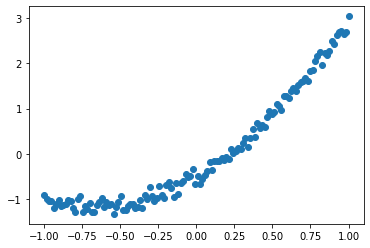

In [ ]:
plt.scatter(x,y)

In [ ]:
class MyModel(nn.Module):
  def __init__(self, input_dim=1, hidden_dim= 64,  output_dim=1):
    super().__init__()
    self.layer1 = nn.Linear(input_dim, hidden_dim)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(hidden_dim, output_dim)
    #or nn.Sigmoid(), which ever one you wish.

  def forward(self, xb):
    x = self.layer1(xb)
    x = self.relu(x)
    out = self.layer2(x)
    return out

In [ ]:
training_dataset = TensorDataset(X, Y)
training_loader = DataLoader(training_dataset, batch_size=32, shuffle=True)

In [ ]:
for batch in training_loader:
  xb, yb = batch
  print(yb)
  break

tensor([[-1.1865],
        [-1.1094],
        [-1.3330],
        [-1.0633]])


In [ ]:
for batch in training_loader:
  xb, yb = batch
  print(xb.shape)

torch.Size([32, 1])
torch.Size([32, 1])
torch.Size([32, 1])
torch.Size([32, 1])


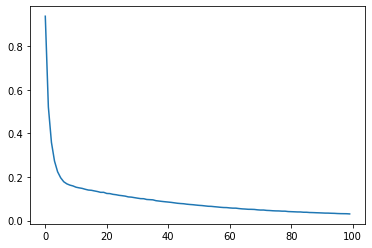

In [ ]:
num_epochs = 100
lr = 0.01
epoch_loss = []

model = MyModel()
opt = SGD(model.parameters(), lr = lr)

for i in range(num_epochs):
  batch_losses = []
  for xb,yb in training_loader:
    yhat = model(xb)
    loss = F.mse_loss(yhat, yb)
    opt.zero_grad()
    loss.backward()
    opt.step()
    batch_losses.append(loss.detach().item())

  epoch_loss.append(torch.tensor(batch_losses).mean().item())

plt.plot(epoch_loss)

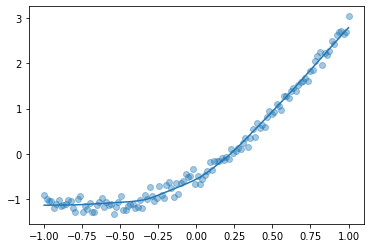

In [ ]:
ypred = model(X)
plt.scatter(x,y, alpha=0.4)
plt.plot(x, ypred.detach().numpy())

In [ ]:
model_illustration = MyModel()

In [ ]:
model_illustration.parameters()

<bound method Module.parameters of MyModel(
  (layer1): Linear(in_features=1, out_features=64, bias=True)
  (relu): ReLU()
  (layer2): Linear(in_features=64, out_features=1, bias=True)
)>

In [ ]:
SGD?